https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [90]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [91]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [92]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [93]:
loc = 'Sarjapur  Road'
df2 = df1[df1.location==loc].drop(['society','balcony','availability'],axis='columns')
df2.shape

(399, 6)

**Handle NA values**

In [94]:
df2.isnull().sum()

area_type     0
location      0
size          2
total_sqft    0
bath          7
price         0
dtype: int64

In [95]:
df3 = df2[df2.bath.notnull()]
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

**Add BHK feature**

In [96]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([3, 2, 4, 1, 5], dtype=int64)

**Process only 2 and 3 bedroom homes**

In [97]:
# df4 = df3[np.isin(df3.bhk, [2,3])]
df4 = df3.copy()
df4.shape

(392, 7)

In [98]:
df4.head(2)

,area_type,location,size,total_sqft,bath,price,bhk
41,Super built-up Area,Sarjapur Road,3 BHK,1254,3.0,38.0,3
115,Built-up Area,Sarjapur Road,3 Bedroom,2497,3.0,140.0,3


In [99]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [100]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [101]:
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,area_type,location,size,total_sqft,bath,price,bhk
41,Super built-up Area,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3
115,Built-up Area,Sarjapur Road,3 Bedroom,2497.0,3.0,140.0,3


In [102]:
df5 = df4.copy()
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk
41,Super built-up Area,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3
115,Built-up Area,Sarjapur Road,3 Bedroom,2497.0,3.0,140.00,3
219,Super built-up Area,Sarjapur Road,3 BHK,1787.0,3.0,98.29,3
220,Super built-up Area,Sarjapur Road,3 BHK,1787.0,3.0,125.00,3
223,Super built-up Area,Sarjapur Road,2 BHK,984.0,2.0,44.28,2


In [103]:
df6 = df5.copy()
df6.head(2)

,area_type,location,size,total_sqft,bath,price,bhk
41,Super built-up Area,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3
115,Built-up Area,Sarjapur Road,3 Bedroom,2497.0,3.0,140.0,3


<h2 style="color:purple">Clean up data using price per square feet</h2>

**Find out price per square feet**

In [104]:
df7 = df6.copy()
df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft']
df7.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
41,Super built-up Area,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030.303030
115,Built-up Area,Sarjapur Road,3 Bedroom,2497.0,3.0,140.00,3,5606.728074
219,Super built-up Area,Sarjapur Road,3 BHK,1787.0,3.0,98.29,3,5500.279799
220,Super built-up Area,Sarjapur Road,3 BHK,1787.0,3.0,125.00,3,6994.963626
223,Super built-up Area,Sarjapur Road,2 BHK,984.0,2.0,44.28,2,4500.000000


In [105]:
df7_stats = df7['price_per_sqft'].describe()
df7_stats

count    3.920000e+02
mean     3.677544e+04
std      6.057838e+05
min      2.551020e+03
25%      4.577889e+03
50%      5.700303e+03
75%      7.337726e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

(array([369.,  22.,   0., ...,   0.,   0.,   0.]),
 array([       0,    10000,    20000, ..., 11970000, 11980000, 11990000]),
 <a list of 1199 Patch objects>)

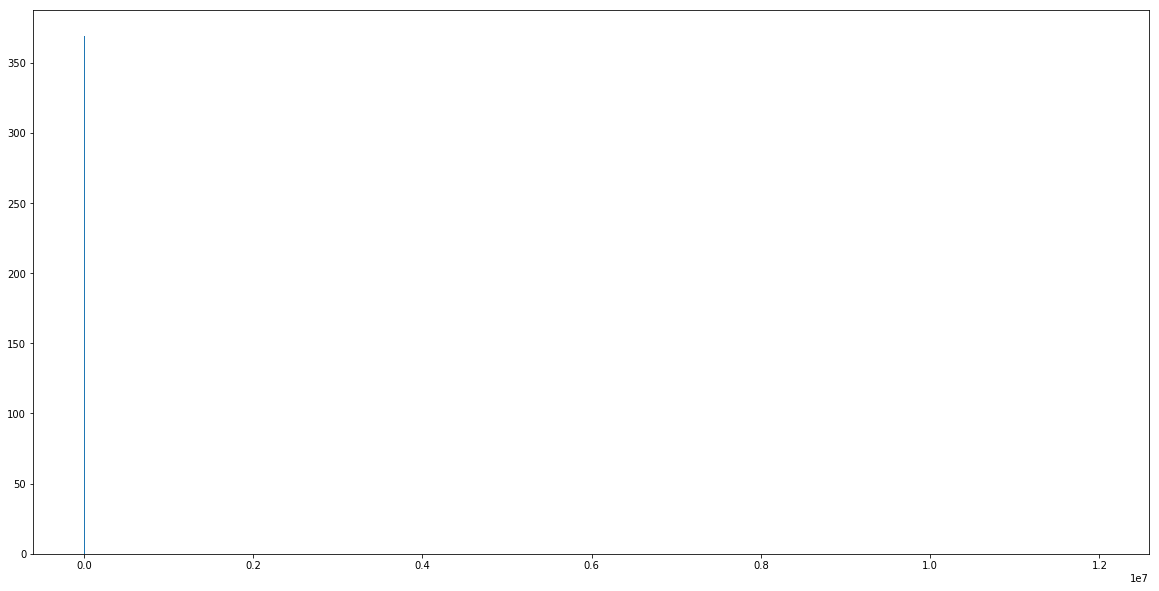

In [106]:
max_price_per_sqft = int(max(df7['price_per_sqft']))
b = range(0,max_price_per_sqft,10000)
plt.hist(df7.price_per_sqft,bins=b, rwidth=0.8)

In [107]:
df7.shape

(392, 8)

In [108]:
df7[df7.price_per_sqft<(df7_stats['mean']-df7_stats['std'])].head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [109]:
df8 = df7[(df7.price_per_sqft<(df7_stats['mean']+df7_stats['std'])) &
    (df7.price_per_sqft>=(df7_stats['mean']-df7_stats['std']))]
df8.shape

(391, 8)

<h2 style='color:purple'>Handle bathrooms feature</h2>

In [110]:
df8.bath.unique()

array([3., 2., 4., 1., 5., 6., 7.])

(array([ 13., 182.,   0., 124.,   0.,  48.,  16.,   0.,   6.,   2.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

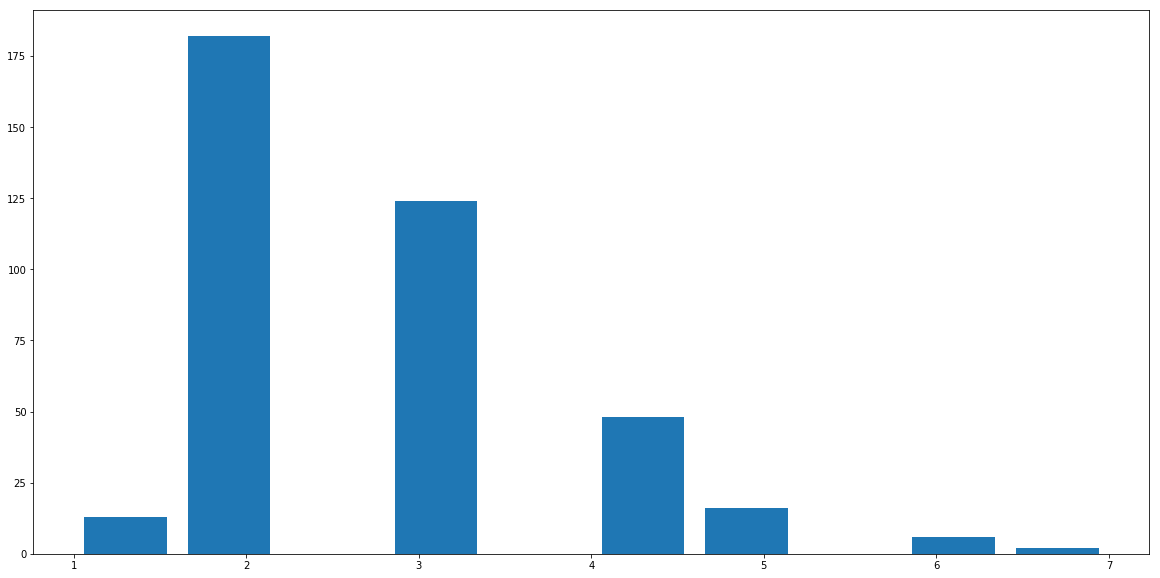

In [111]:
plt.hist(df8.bath,rwidth=0.8)

In [112]:
df8.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [113]:
df9 = df8.drop(['area_type','location','size'],axis='columns')
df9.head()

,total_sqft,bath,price,bhk,price_per_sqft
41,1254.0,3.0,38.00,3,3030.303030
115,2497.0,3.0,140.00,3,5606.728074
219,1787.0,3.0,98.29,3,5500.279799
220,1787.0,3.0,125.00,3,6994.963626
223,984.0,2.0,44.28,2,4500.000000


<h2 style='color:purple'>Build a model now</h2>

In [114]:
df9.shape

(391, 5)

In [115]:
df9[(df9.bhk==2) & (df9.price_per_sqft>11363)]

,total_sqft,bath,price,bhk,price_per_sqft


In [116]:
bhk_stats = {}
for key, subdf in df9.groupby('bhk'):
    bhk_stats[key] = {
        'mean': np.mean(subdf.price_per_sqft),
        'std': np.std(subdf.price_per_sqft),
        'count': subdf.shape[0]
    }
bhk_stats

{1: {'mean': 4994.694704414888, 'std': 1485.913025465236, 'count': 13},
 2: {'mean': 5176.13699760796, 'std': 1257.8056966444667, 'count': 139},
 3: {'mean': 6174.836983388735, 'std': 1846.131488137441, 'count': 179},
 4: {'mean': 8949.085933499797, 'std': 3461.33577530558, 'count': 51},
 5: {'mean': 7761.975371209643, 'std': 2136.8725137333695, 'count': 9}}

In [117]:
exclude_indices = np.array([])
for key,subdf in df9.groupby('bhk'):
    stats = bhk_stats.get(key-1)
    if stats and stats['count']>10:
        exclude_indices = np.append(exclude_indices, subdf[subdf.price_per_sqft<stats['mean']].index.values)

In [118]:
len(exclude_indices)

136

In [119]:
df10 = df9.drop(exclude_indices,axis='index')
df10.shape

(255, 5)

**Build a model**

In [120]:
df10.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [121]:
X = df10.drop(['price','price_per_sqft'],axis='columns')
X.head()

,total_sqft,bath,bhk
115,2497.0,3.0,3
219,1787.0,3.0,3
220,1787.0,3.0,3
331,1000.0,2.0,2
452,1346.0,2.0,2


In [122]:
X.shape

(255, 3)

In [123]:
y = df10.price
y.head()

115    140.00
219     98.29
220    125.00
331     67.00
452     74.03
Name: price, dtype: float64

In [124]:
len(y)

255

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model.coef_

array([  0.1178041 , -12.13599915,   9.61712692])

In [129]:
model.intercept_

-66.53719437490147

In [128]:
model.predict([
    [1000,2,2],
    [1000,2,3]
])

array([46.22915647, 55.84628339])